In [1]:
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
import librosa.display

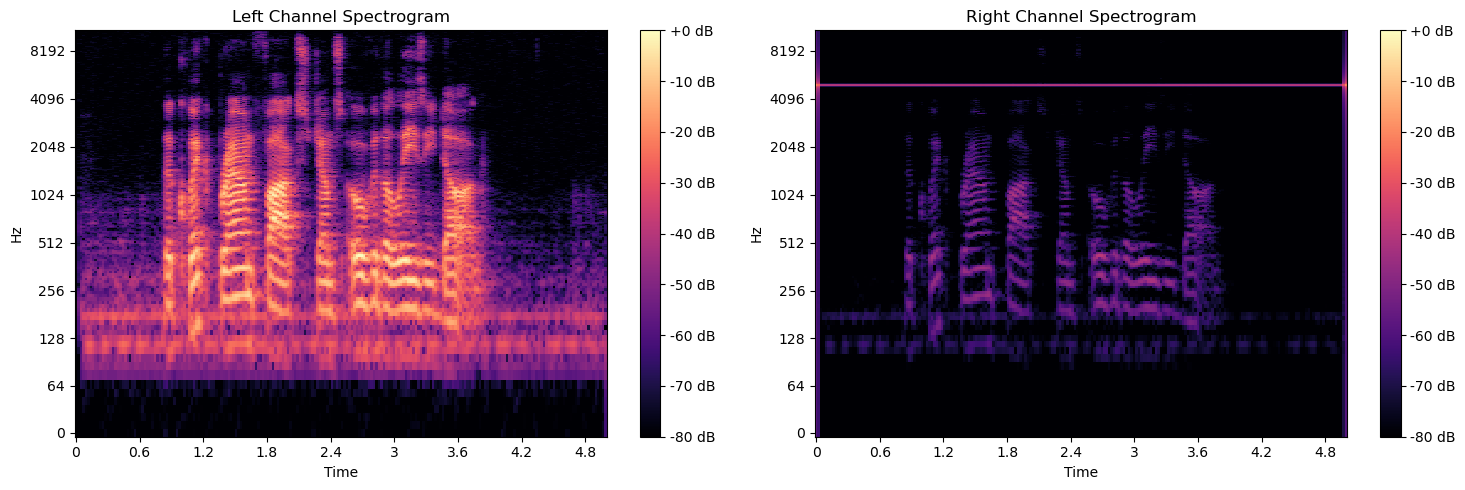

In [3]:
speech_filename = 'TheBrownFox.wav'
speech_sr, speech_data_stereo = read(speech_filename)

# Extract channels
left_channel = speech_data_stereo[:, 0]
right_channel = speech_data_stereo[:, 1]

# Generate 5000 Hz sine wave
t = np.arange(0, len(left_channel) / speech_sr, 1/speech_sr)
frequency = 5000
sine_wave = np.sin(2 * np.pi * frequency * t)

right_channel_with_sine = right_channel + sine_wave
stereo_signal = np.column_stack((left_channel, right_channel_with_sine))

# Play
sd.play(stereo_signal, samplerate=speech_sr)
sd.wait()

write('CharpPinaWest-stereospeechsine.wav', speech_sr, stereo_signal.astype(np.int16))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(left_channel)), ref=np.max), y_axis='log', x_axis='time', sr=speech_sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Left Channel Spectrogram')
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(right_channel_with_sine)), ref=np.max), y_axis='log', x_axis='time', sr=speech_sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Right Channel Spectrogram')

plt.tight_layout()
plt.show()